### Codio Activity 7.3: Using SciPy Optimize To Optimize L2 Loss

**Expected Time = 45 minutes**

**Total Points = 15**

This assignment focuses on using `scipy.optimize` to minimize the mean squared error for a linear model.  For this example,  a synthetic dataset is created using `sklearn`.  

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

### Creating Data

To create the dataset, a linear function with known slope is created, and gaussian noise is added to each point at random.  This allows comparison to the results and helps to see if the minimum solution is reasonable. 

$$y = 4.2x + \sigma$$

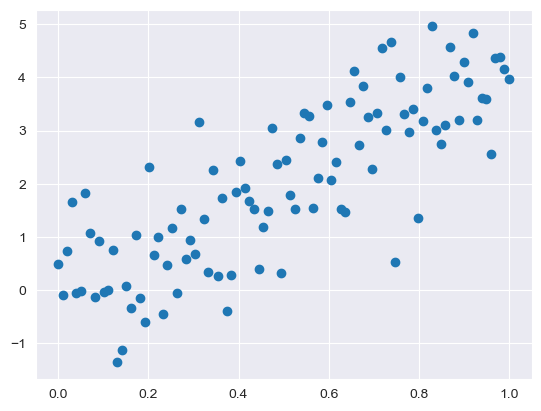

In [29]:
np.random.seed(42)
x = np.linspace(0, 1, 100)
y = 4.2*x + np.random.normal(size = 100)
plt.scatter(x, y)

[Back to top](#Index:) 

## Problem 1

### Array of $\theta$'s

**5 Points**

Below, create an array of possible $\theta$ values using `np.linspace`.  Create 100 values starting at 3 and ending at 5.  Assign your solution as an array to `thetas` below.

In [37]:
### GRADED

thetas = ''

### BEGIN SOLUTION
thetas = np.linspace(3, 5, 100)
### END SOLUTION

# Answer check
print(type(thetas))
print(thetas.shape)

<class 'numpy.ndarray'>
(100,)


In [38]:
### BEGIN HIDDEN TESTS
thetas_ = np.linspace(3, 5, 100)
#
#
#
assert type(thetas_) == type(thetas)
np.testing.assert_array_equal(thetas_,thetas)
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 2

### Loss Function

**5 Points**

Now, complete the function `l2_loss` below that accepts a single $\theta$ value as input and calculates the mean squared error based on the true y-values and the given theta. The function should return a single float value representing the mean squared error.

In [40]:
### GRADED
def l2_loss(theta):
  """
  This function accepts a single theta value
  and calculates the mean squared error based
  on (theta*x - y)^2

  Arguments
  ---------
  theta: float
    The value to use for the parameter of the
    regression model.

  Returns
  -------
  mse: float
    Mean Squared Error
  """

### BEGIN SOLUTION
def l2_loss(theta):
    return np.mean((y - theta*x)**2)
### END SOLUTION

mses = l2_loss(8)
print(mses)
print(type(mses))

5.970444002663118
<class 'numpy.float64'>


In [41]:
### BEGIN HIDDEN TESTS
def l2_loss_(theta):
    return np.mean((y - theta*x)**2)
solns = [l2_loss(i) for i in range(2, 6)]
solns_ = [l2_loss_(i) for i in range(2, 6)]
#
#
#
assert solns == solns_
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 3

### Using `scipy` to minimize `l2_loss`

**5 Points**

Use the `minimize` function that has been imported from `scipy.optimize` to find the minimum value of $\theta$ using `x0 = 4`.  Assign your results to the `minimum_theta` variable below.  Use the `minimum_theta.x` attribute to examine the solution and assign as a numpy array to `theta_solution` below.

In [42]:
### GRADED

minimum_theta = ''
theta_solution = ''

### BEGIN SOLUTION
minimum_theta = minimize(l2_loss, x0 = 4)
theta_solution = minimum_theta.x
### END SOLUTION

# Answer check
print(type(theta_solution))
print(theta_solution)

<class 'numpy.ndarray'>
[4.08001601]


In [43]:
### BEGIN HIDDEN TESTS
def l2_loss_(theta):
    return np.mean((y - theta*x)**2)
minimum_theta_ = minimize(l2_loss_, x0 = 4)
theta_solution_ = minimum_theta_.x
#
#
#
np.testing.assert_array_almost_equal(theta_solution, theta_solution_)
### END HIDDEN TESTS

Now that you have found the minimum value, you can uncomment the code below and visualize the mean squared error along with the minimum value based on `scipy`.  

Text(0, 0.5, 'MSE')

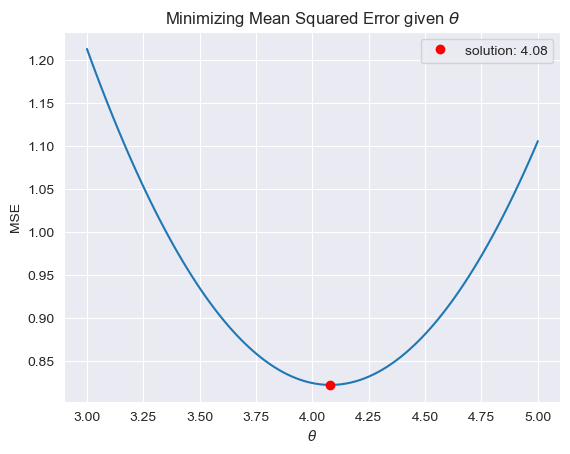

In [36]:
plt.plot(thetas, [l2_loss(i) for i in thetas])
plt.plot(theta_solution, l2_loss(theta_solution), 'ro', label = f'solution: {np.round(theta_solution[0], 3)}')
plt.legend()
plt.title(r'Minimizing Mean Squared Error given $\theta$')
plt.xlabel(r'$\theta$')
plt.ylabel('MSE')